In [32]:
import pandas as pd
import matplotlib.pyplot as plt


G_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/model_10_10/test_predict.csv')
G_predict = G_predict_set.iloc[:,1].tolist()
G_true = G_predict_set.iloc[:,0].tolist()


CP_predict_set = pd.read_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/test_preds_temp _CHEMPROP.csv')
CP_predict = CP_predict_set.iloc[:,1].tolist()
CP_smiles = CP_predict_set.iloc[:,0].tolist()

In [19]:
len(CP_predict)
len(G_predict)

116

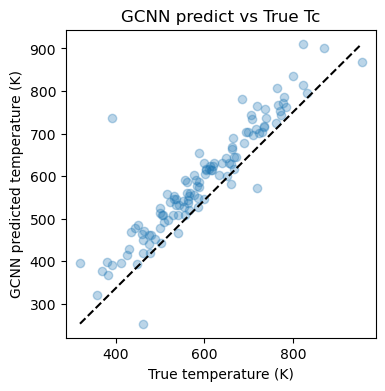

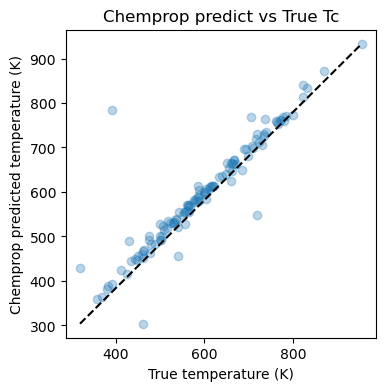

In [40]:
#predict vs true for GCNN and Chemprop
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, G_predict, alpha=0.3)
plt.plot([min(G_true), max(G_true)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs True Tc')
plt.show()

plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(G_true, CP_predict , alpha=0.3)
plt.plot([min(G_true), max(G_true)], [min(CP_predict),max(CP_predict)], color="k", ls="--")
plt.xlabel('True temperature (K)')
plt.ylabel('Chemprop predicted temperature (K)')
plt.title('Chemprop predict vs True Tc')
plt.show()

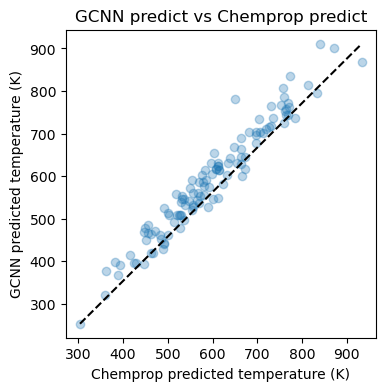

In [38]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(CP_predict, G_predict, alpha=0.3)
plt.plot([min(CP_predict), max(CP_predict)], [min(G_predict),max(G_predict)], color="k", ls="--")
plt.xlabel('Chemprop predicted temperature (K)')
plt.ylabel('GCNN predicted temperature (K)')
plt.title('GCNN predict vs Chemprop predict')
plt.show()


In [27]:
#how to get the error associated with each data point? 
#true abs erroe = abs(predicted - actual)
chemprop_error = []
gcnn_error = []
for index in range(0, len(G_true)):
    cp_error = abs(CP_predict[index] - G_true[index])
    g_error = abs(G_predict[index] - G_true[index])
    chemprop_error.append(cp_error)
    gcnn_error.append(g_error)



In [30]:
print(chemprop_error)
chemprop_smiles_error = list(zip(CP_smiles, chemprop_error))

chemprop_smiles_error = pd.DataFrame(chemprop_smiles_error)
chemprop_smiles_error.columns = ['SMILES', 'chemprop_error']

chemprop_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/chemprop_smiles_error.csv', index=False)


[17.945065924946732, 26.354190485995787, 3.725021846965319, 19.345347889196773, 8.011879484199994, 2.748531599386979, 4.136271402078478, 3.33046234840333, 4.706027781064222, 1.0110126850720462, 1.6048877661592087, 1.6669832260481598, 3.1621883076154518, 1.119676644066658, 7.1462743296639815, 1.1215621669514348, 3.060208820606931, 1.0537591992017497, 4.103384932645213, 2.354070794316044, 8.1594034826619, 3.4276059573169277, 11.961058109427313, 28.1935970328268, 9.729725236098716, 3.6136630680556436, 0.5445731417672732, 1.9804395151901417, 5.7654544944177815, 62.89737620114329, 3.911657961061451, 5.826141015051974, 2.348544942659885, 12.725037376281364, 1.206350183811196, 5.259261859244816, 2.053779552445576, 6.0567605791413826, 393.1502791508766, 18.551863373116134, 6.885787894172836, 17.088321870011328, 24.452315834978435, 7.261415019657875, 13.015645185552899, 3.792890130340311, 4.4637076780559255, 11.163811406749574, 34.373259130089764, 20.35242322501142, 14.803895977304705, 9.412799

In [31]:
print(gcnn_error)
gcnn_smiles_error = list(zip(CP_smiles, gcnn_error))

gcnn_smiles_error = pd.DataFrame(gcnn_smiles_error)
gcnn_smiles_error.columns = ['SMILES', 'gcnn_error']

gcnn_smiles_error.to_csv('/home/jbd3qn/Downloads/critical_temp_GCNN/dataset_editing/gcnn_smiles_error.csv', index=False)

[1.247000000000014, 34.208560000000034, 8.499630000000025, 5.954500000000053, 5.890969999999925, 4.961729999999989, 4.739869999999996, 23.760440000000017, 0.9901999999999589, 23.30385000000001, 27.57529999999997, 36.10626000000002, 30.86130000000003, 24.177599999999984, 35.77099999999996, 18.373429999999985, 31.802149999999983, 13.653140000000008, 37.93060000000003, 40.28380000000004, 28.12239999999997, 10.150099999999952, 12.468399999999974, 20.545799999999986, 29.807999999999993, 17.790849999999978, 10.050299999999993, 26.669459999999958, 6.022299999999973, 39.30179999999996, 11.603050000000053, 5.9021000000000186, 14.05880000000002, 17.247539999999958, 5.722000000000037, 9.22102000000001, 34.62349999999992, 42.05970000000002, 345.60605, 31.449250000000006, 15.535800000000108, 67.99660000000006, 28.049499999999966, 24.73350000000005, 14.923099999999977, 2.134300000000053, 20.35889999999995, 45.01497000000006, 96.49407000000008, 10.041200000000003, 6.09375, 20.286100000000033, 145.067

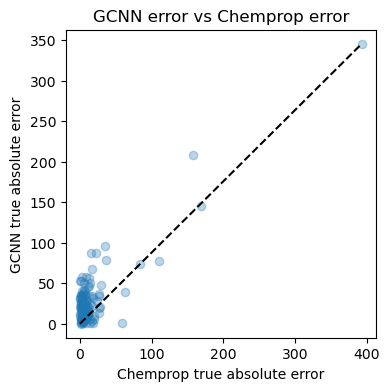

In [24]:
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(chemprop_error, gcnn_error, alpha=0.3)
plt.plot([min(chemprop_error), max(chemprop_error)], [min(gcnn_error),max(gcnn_error)], color="k", ls="--")
plt.xlabel('Chemprop true absolute error')
plt.ylabel('GCNN true absolute error')
plt.title('GCNN error vs Chemprop error')
plt.show()